In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./titanic/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 欄位定義
PassengerId:乘客唯一識別碼

Survived:表示乘客的生存狀態，0 表示未生還，1 表示生還。

Pclass:乘客的艙位等級，反映了乘客的社會經濟地位，1 = 1st, 2 = 2nd, 3 = 3rd。

Name:乘客姓名，通常包含頭銜（如 Mr.、Mrs. 等），有時還包括親屬關係（如 Mrs. John Bradley (Florence Briggs Thayer) 表示這位女士是 John Bradley 的妻子）

Sex:性別，male = 男性，female = 女性。

Age:乘客年齡。

SibSp:乘客在船上的兄弟姐妹/配偶數量。

Parch:乘客在船上的父母/子女數量。

Ticket:乘客的船票號碼。

Fare:乘客支付的票價，票價與乘客的艙位等級相關。

Cabin:乘客的艙位號碼。

Embarked:乘客登船的港口，C = Cherbourg, Q = Queenstown, S = Southampton。

### 進一步觀察每一個欄位「數值欄位/類別欄位」與「是否生存欄位」之關係程度，找出關係大的欄位。

In [3]:
# 分為數值欄位及類別欄位的df
df_stats = df[['Age','SibSp','Parch','Fare','Survived']]
df_stats

,Age,SibSp,Parch,Fare,Survived
0,22.0,1,0,7.2500,0
1,38.0,1,0,71.2833,1
2,26.0,0,0,7.9250,1
3,35.0,1,0,53.1000,1
4,35.0,0,0,8.0500,0
...,...,...,...,...,...
886,27.0,0,0,13.0000,0
887,19.0,0,0,30.0000,1
888,NaN,1,2,23.4500,0
889,26.0,0,0,30.0000,1


In [4]:
df_class = df[['Pclass','Sex','Embarked','Survived']]
df_class

,Pclass,Sex,Embarked,Survived
0,3,male,S,0
1,1,female,C,1
2,3,female,S,1
3,1,female,S,1
4,3,male,S,0
...,...,...,...,...
886,2,male,S,0
887,1,female,S,1
888,3,female,S,0
889,1,male,C,1


In [5]:
# 計算數值欄位相關係數
correlation_matrix = df_stats.corr()

# 顯示與生存欄位相關係數最大的欄位
print(correlation_matrix["Survived"].sort_values(ascending=False))

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Name: Survived, dtype: float64


Pclass


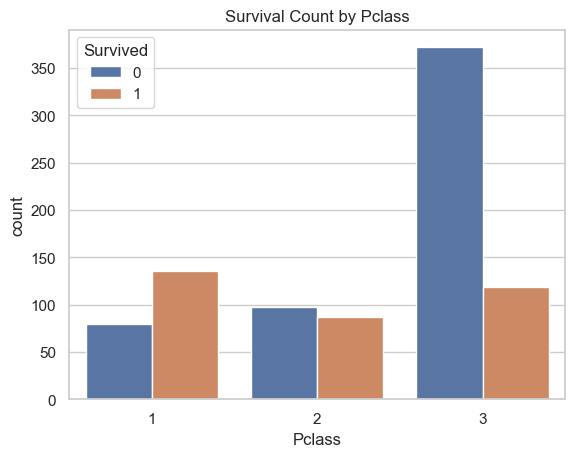

Sex


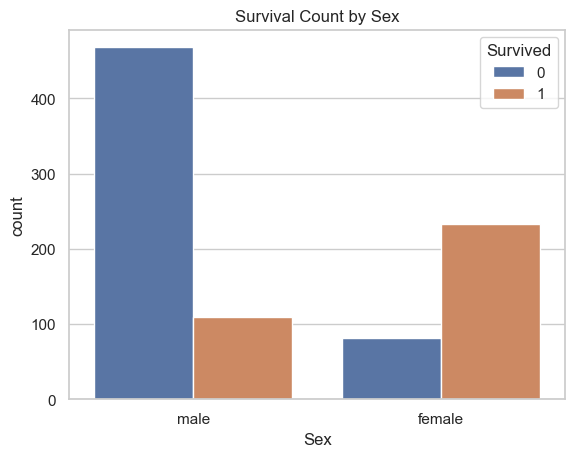

Embarked


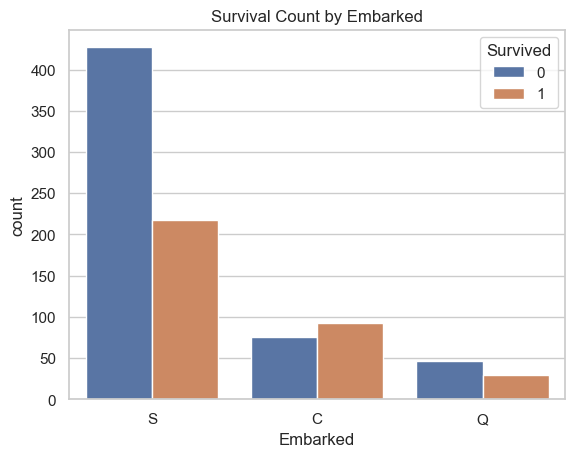

Survived


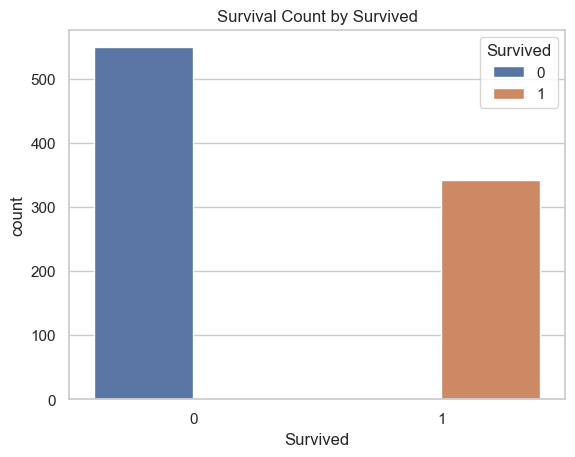

In [6]:
for i in df_class.columns:
    print(i)
    # 設置圖形風格
    sns.set(style="whitegrid")

    # 繪製性別和生存率的計數圖
    sns.countplot(x=i, hue="Survived", data=df)
    plt.title(f"Survival Count by {i}")
    plt.show()

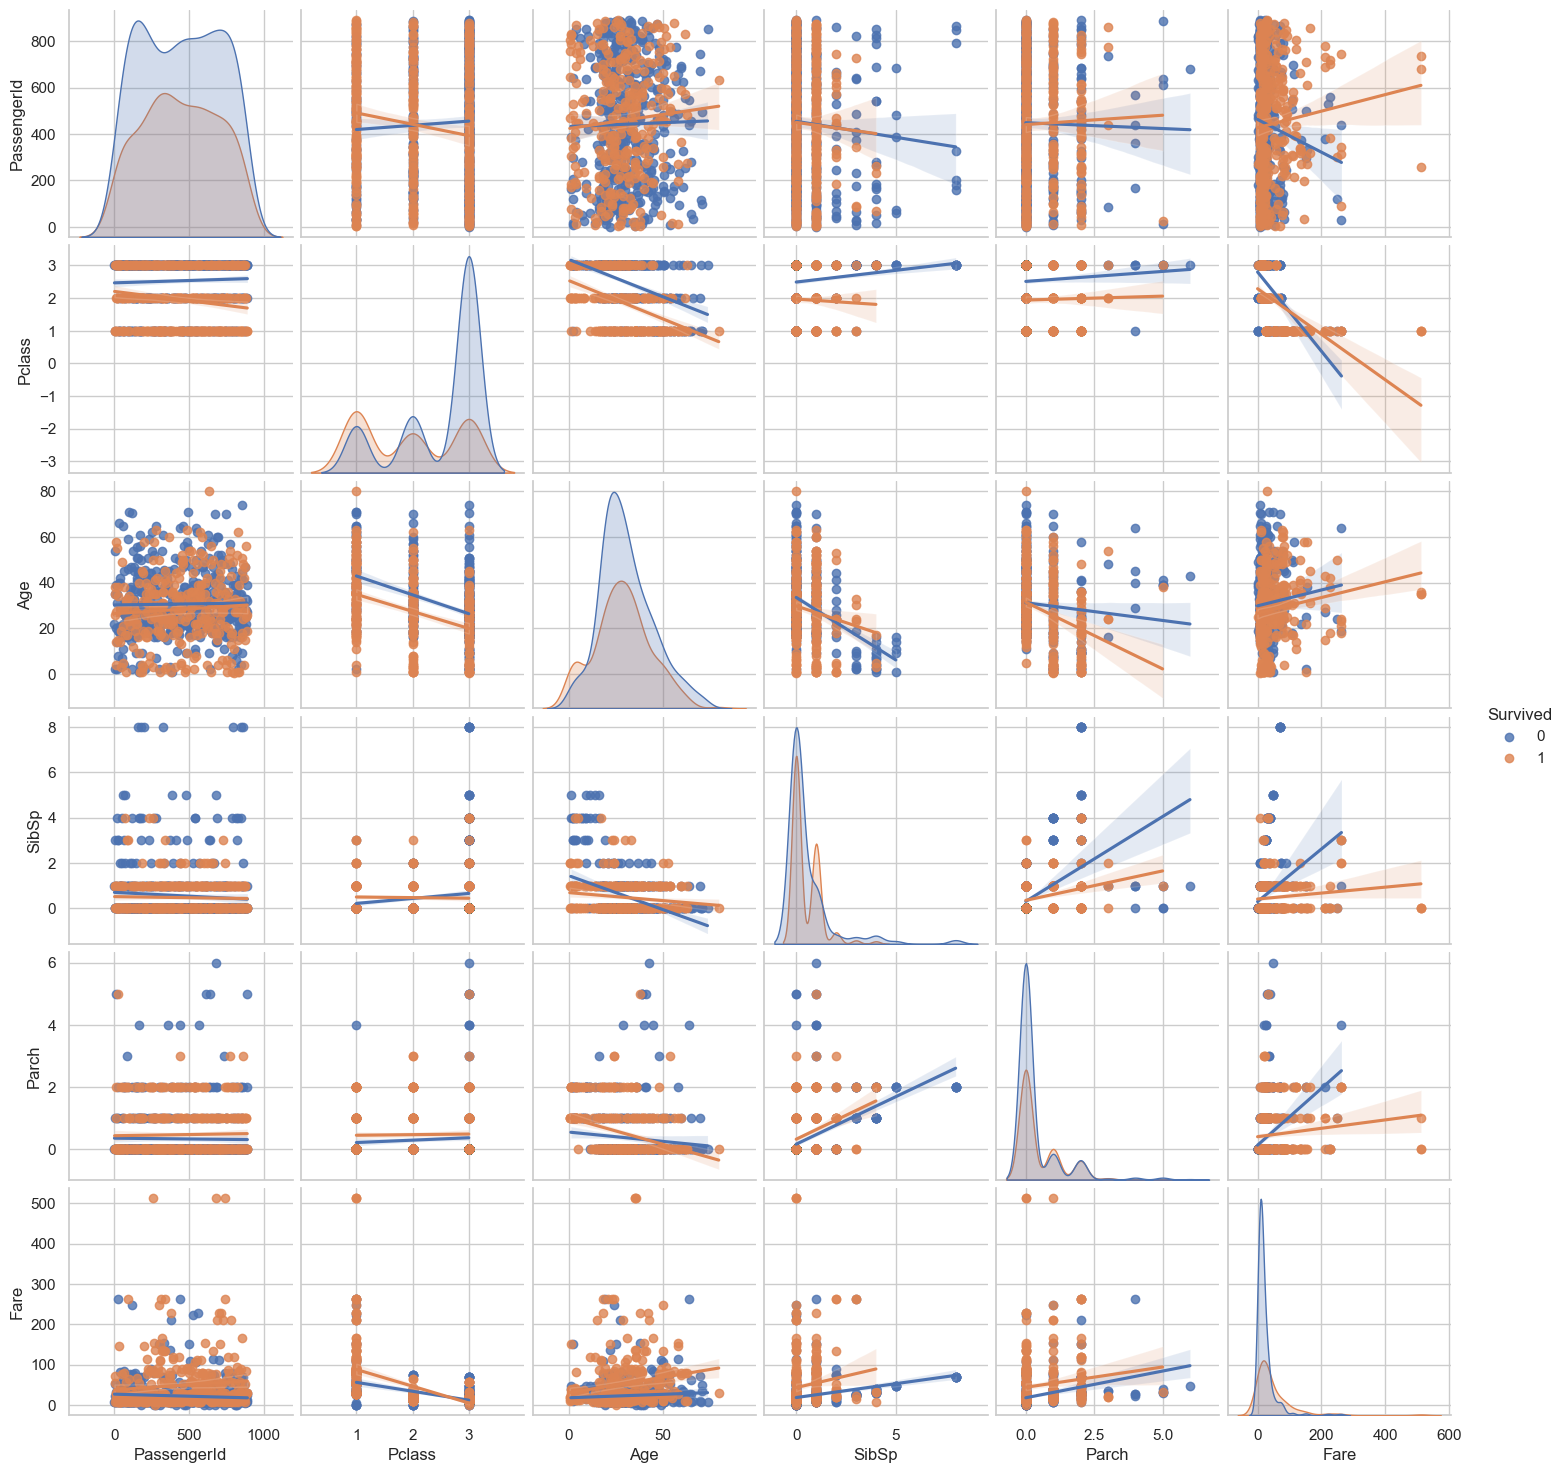

In [7]:
# kind:非對角線圖形, diag_kind:對角線圖形, hue:依照class分群df['target']
sns.pairplot(df,kind="reg", hue='Survived', diag_kind='kde')
plt.show()

### 找出關係大的欄位，如何定義與解讀什麼稱為「關係大」呢？
經以上數據視覺化觀察後，認為關係大的欄位包含Fare，Sex及Pclass與Survived關係可能較大
因為Fare在相關係數中是與Survived關係最高(排除Survived本身之外的欄位)，也可以推測Fare較高的乘客的確存活率較高(有遊艇提供給地位較高乘客)，
這點在Pclass及Survived的長條圖也可看出，在Pclass = 1的乘客中生存的數量大於未生存的數量。
至於Sex欄位，在與Survived的長條圖中可看出，女性的生存數量也是較多的。


# Task #03：鐵達尼號存活預測專題實作（2） - 建立第一個 Baseline 版本

1. 在資料分析的工作流程中，在不考慮準確度情況下有哪些必備的環節？
Ans：Nan data需處裡(補值)、Category feature需做one hot encoding

In [8]:
# pick the columns are importance
df_task03 = df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Survived']]
#df_task03

In [9]:
print('\ncheck numbers of null',df_task03.isnull().sum())


check numbers of null Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Survived      0
dtype: int64


In [10]:
# fillna with mode and mean for Embarked and Age column
df_task03['Embarked'].fillna(df_task03['Embarked'].mode()[0], inplace = True)
df_task03['Age'].fillna(int(df_task03['Age'].mean()),inplace = True)
print('\nAfter fillna:\n',df_task03.isnull().sum())


After fillna:
 Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_908\1933802923.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task03['Embarked'].fillna(df_task03['Embarked'].mode()[0], inplace = True)
C:\Users\User\AppData\Local\Temp\ipykernel_908\1933802923.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task03['Age'].fillna(int(df_task03['Age'].mean()),inplace = True)


In [11]:
# one-hot encoding
df_task03 = pd.get_dummies(df_task03)
print('\nafter one hot encoding',df_task03)


after one hot encoding      Pclass   Age  SibSp  Parch     Fare  Survived  Sex_female  Sex_male  \
0         3  22.0      1      0   7.2500         0           0         1   
1         1  38.0      1      0  71.2833         1           1         0   
2         3  26.0      0      0   7.9250         1           1         0   
3         1  35.0      1      0  53.1000         1           1         0   
4         3  35.0      0      0   8.0500         0           0         1   
..      ...   ...    ...    ...      ...       ...         ...       ...   
886       2  27.0      0      0  13.0000         0           0         1   
887       1  19.0      0      0  30.0000         1           1         0   
888       3  29.0      1      2  23.4500         0           1         0   
889       1  26.0      0      0  30.0000         1           0         1   
890       3  32.0      0      0   7.7500         0           0         1   

     Embarked_C  Embarked_Q  Embarked_S  
0             0      

In [12]:
df_task03

,Pclass,Age,SibSp,Parch,Fare,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,1,0,0,0,1
888,3,29.0,1,2,23.4500,0,1,0,0,0,1
889,1,26.0,0,0,30.0000,1,0,1,1,0,0


In [13]:
columns_X = list(set(df_task03.columns) - {'Survived'})
columns_y = ['Survived']


train_X = df_task03[columns_X]
train_y = df_task03[columns_y]


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


log = LogisticRegression(random_state=0, max_iter=3000)
scores = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy')
print(scores)

[0.77094972 0.78651685 0.78089888 0.76966292 0.82022472]


# Task #04：鐵達尼號存活預測專題實作（3） - 運用資料與特徵優化分析

1. 請問資料中有哪些「欄位」你覺得是多餘的，在分析過程中應該被排除的呢？為什麼？
PassengerId, Name, Ticket, Cabin 這幾個欄位屬於多餘，
PassengerId為唯一識別碼，對於預測沒有實際意義。
Name 姓名對於生存預測幫助不大。
Ticket及Cabin 沒有直接的預測意義。

2. 針對「有缺失值」的欄位，嘗試不同的處理策略（例如：常數、中位數、平均數填補）比較結果。
Embarked and Age column有缺失值，Embarked屬於類別欄位，我們利用該欄位眾數('S')補值。
Age屬於類別欄位年齡，這邊我們利用平均值(29)進行補值。

3. 針對「非數值型」的欄位，嘗試不同的處理策略（例如：LabelEncoder 或 OneHotEncoder）比較結果。
非數值型欄位Sex, Embarked利用OneHotEncoder方法轉換欄位。

以上皆於Task #03已完成。

4. 請你嘗試不同的特徵工程手法，產生可以幫助分析結果的新變數。

針對Age,Fare及(SibSp+Parch)進行cut分箱，新增特徵分類

Age分為[0, 10, 20, 30, 40, 50, 60, 70, max(df_task04.Age)]

Fare分為[-1, 100, 200, 300, max(df_task04.Fare)]

以及新增Family欄位為(SibSp+Parch)並分為[-1, 2, 5, max(df_task04.Family)]

In [14]:
df_task04 = df_task03
df_task04

,Pclass,Age,SibSp,Parch,Fare,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,1,0,0,0,1
888,3,29.0,1,2,23.4500,0,1,0,0,0,1
889,1,26.0,0,0,30.0000,1,0,1,1,0,0


In [15]:
# Age做分箱
#print(max(df_task04.Age))
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, max(df_task04.Age)]
age_labels = list(range(0,8,1))#['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-']

In [16]:
df_task04['Age'] = pd.cut(df_task04['Age'], bins=age_bins, labels=age_labels)#.sort_values()

In [17]:
df_task04

,Pclass,Age,SibSp,Parch,Fare,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,2,1,0,7.2500,0,0,1,0,0,1
1,1,3,1,0,71.2833,1,1,0,1,0,0
2,3,2,0,0,7.9250,1,1,0,0,0,1
3,1,3,1,0,53.1000,1,1,0,0,0,1
4,3,3,0,0,8.0500,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,2,2,0,0,13.0000,0,0,1,0,0,1
887,1,1,0,0,30.0000,1,1,0,0,0,1
888,3,2,1,2,23.4500,0,1,0,0,0,1
889,1,2,0,0,30.0000,1,0,1,1,0,0


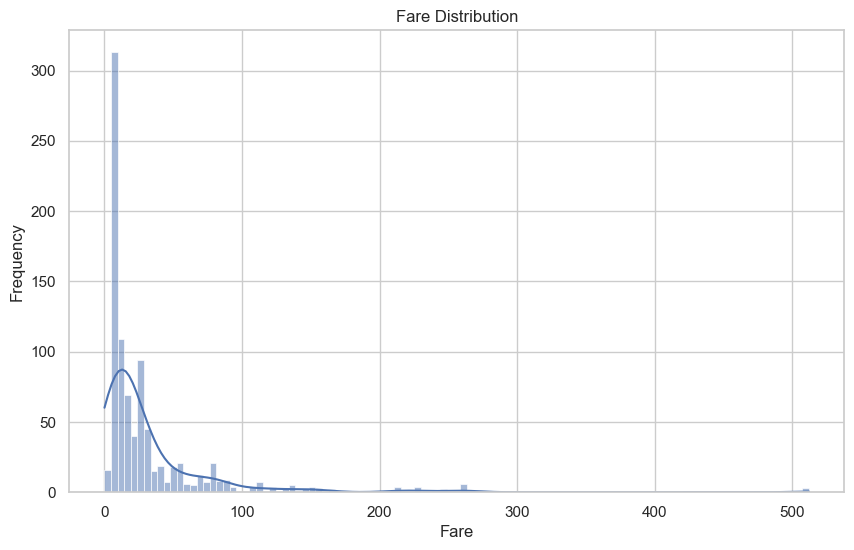

In [18]:
# 查看票價Fare分布
plt.figure(figsize=(10, 6))
sns.histplot(df_task04['Fare'], kde=True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

In [19]:
df.Fare.value_counts().sort_index()

0.0000      15
4.0125       1
5.0000       1
6.2375       1
6.4375       1
            ..
227.5250     4
247.5208     2
262.3750     2
263.0000     4
512.3292     3
Name: Fare, Length: 248, dtype: int64

In [20]:
# Fare做分箱
#print(max(df_task04.Age))
Fare_bins = [-1, 100, 200, 300, max(df_task04.Fare)]
Fare_labels = list(range(0,4,1))#['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-']

In [21]:
df_task04['Fare'] = pd.cut(df_task04['Fare'], bins=Fare_bins, labels=Fare_labels)#.sort_values()
df_task04

,Pclass,Age,SibSp,Parch,Fare,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,2,1,0,0,0,0,1,0,0,1
1,1,3,1,0,0,1,1,0,1,0,0
2,3,2,0,0,0,1,1,0,0,0,1
3,1,3,1,0,0,1,1,0,0,0,1
4,3,3,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,2,2,0,0,0,0,0,1,0,0,1
887,1,1,0,0,0,1,1,0,0,0,1
888,3,2,1,2,0,0,1,0,0,0,1
889,1,2,0,0,0,1,0,1,1,0,0


In [22]:
# 將Fare利用cut分成4個等級票價
#df_task04['Fare'] = pd.qcut(df_task04['Fare'], q=4, labels=[0, 1, 2, 3])
#df_task04

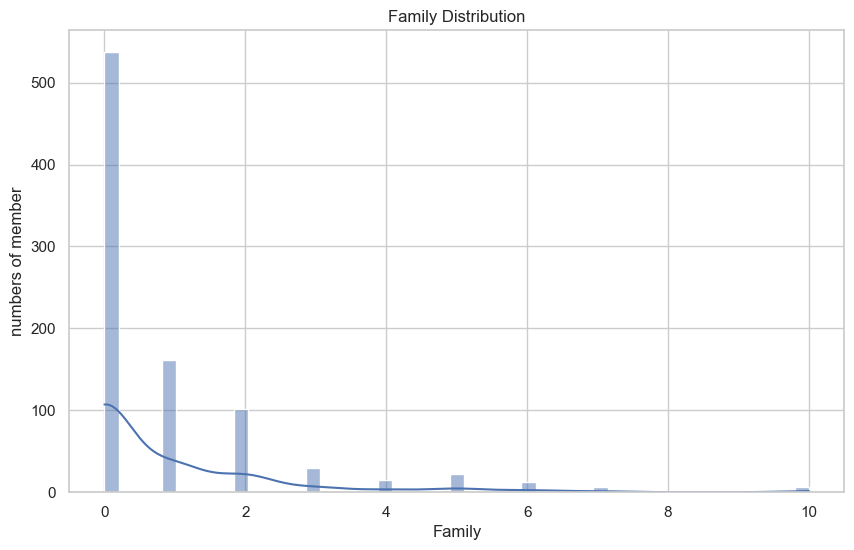

In [23]:
# 將SibSp+Parch合併成Family欄位，一起計算整個家庭人數，比原本各自欄位更有用，並將家庭人數也利用cut分成3類大中小家庭。
df_task04['Family'] = df_task04['SibSp']+df_task04['Parch']
# 查看票價Fare分布
plt.figure(figsize=(10, 6))
sns.histplot(df_task04['Family'], kde=True)
plt.title('Family Distribution')
plt.xlabel('Family')
plt.ylabel('numbers of member')
plt.show()

In [24]:
# Family做分箱
family_bins = [-1, 2, 5, max(df_task04.Family)]
family_labels = [0, 1,2]

In [25]:
df_task04['Family'] = pd.cut(df_task04['Family'], bins=family_bins, labels=family_labels)
df_task04 = df_task04.drop(columns=['SibSp','Parch'])
df_task04

,Pclass,Age,Fare,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Family
0,3,2,0,0,0,1,0,0,1,0
1,1,3,0,1,1,0,1,0,0,0
2,3,2,0,1,1,0,0,0,1,0
3,1,3,0,1,1,0,0,0,1,0
4,3,3,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
886,2,2,0,0,0,1,0,0,1,0
887,1,1,0,1,1,0,0,0,1,0
888,3,2,0,0,1,0,0,0,1,1
889,1,2,0,1,0,1,1,0,0,0


In [26]:
columns_X = list(set(df_task04.columns) - {'Survived'})
columns_y = ['Survived']


train_X = df_task04[columns_X]
train_y = df_task04[columns_y]


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


log = LogisticRegression(random_state=0, max_iter=3000)
scores = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy')
print(scores)
print(scores.mean())

[0.7877095  0.78651685 0.78651685 0.79213483 0.80898876]
0.7923733601154982


# 先處理test.csv

In [27]:
df_task04

,Pclass,Age,Fare,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Family
0,3,2,0,0,0,1,0,0,1,0
1,1,3,0,1,1,0,1,0,0,0
2,3,2,0,1,1,0,0,0,1,0
3,1,3,0,1,1,0,0,0,1,0
4,3,3,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
886,2,2,0,0,0,1,0,0,1,0
887,1,1,0,1,1,0,0,0,1,0
888,3,2,0,0,1,0,0,0,1,1
889,1,2,0,1,0,1,1,0,0,0


In [28]:
df_test = pd.read_csv("./titanic/test.csv")
df_test = df_test.drop(columns=['PassengerId','Name','Ticket','Cabin'])

In [29]:
df_test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [30]:
df_test['Age'].fillna(int(df['Age'].mean()),inplace = True)
df_test['Fare'].fillna(df['Fare'].mean(),inplace = True)

In [31]:
df_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [32]:
df_test = pd.get_dummies(df_test)
df_test

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,29.0,0,0,8.0500,0,1,0,0,1
414,1,39.0,0,0,108.9000,1,0,1,0,0
415,3,38.5,0,0,7.2500,0,1,0,0,1
416,3,29.0,0,0,8.0500,0,1,0,0,1


In [33]:
df_test['Age'] = pd.cut(df_test['Age'], bins=age_bins, labels=age_labels)#.sort_values()
df_test['Fare'] = pd.cut(df_test['Fare'], bins=Fare_bins, labels=Fare_labels)#.sort_values()

df_test['Family'] = df_test['SibSp']+df_test['Parch']
df_test['Family'] = pd.cut(df_test['Family'], bins=family_bins, labels=family_labels)
df_test = df_test.drop(columns=['SibSp','Parch'])
df_test

,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Family
0,3,3,0,0,1,0,1,0,0
1,3,4,0,1,0,0,0,1,0
2,2,6,0,0,1,0,1,0,0
3,3,2,0,0,1,0,0,1,0
4,3,2,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
413,3,2,0,0,1,0,0,1,0
414,1,3,1,1,0,1,0,0,0
415,3,3,0,0,1,0,0,1,0
416,3,2,0,0,1,0,0,1,0


# Task #05：鐵達尼號存活預測專題實作（4） - 模型優化與比較
1. 請嘗試使用 scikit-learn 中「不同基本模型」，並且進行比較結果？

2. 可以利用「sklearn.model_selection 下的 GridSearchCV(...)」進行參數的調整。

3. （進階）最後也請嘗試看看除了 scikit-learn 之外的其他模型套件，例如 pytorch、tensorflow 或 xgboost。

In [34]:
columns_X = list(set(df_task04.columns) - {'Survived'})
columns_y = ['Survived']


train_X = df_task04[columns_X]
train_y = df_task04[columns_y]

In [35]:
# model import
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score



In [36]:
model_list = ['LogisticRegression','SVC','DecisionTreeClassifier','GaussianNB','KNeighborsClassifier','AdaBoostClassifier'
             ,'RandomForestClassifier','GradientBoostingClassifier']

In [37]:
for i in model_list:
    if i == 'LogisticRegression':
        log = LogisticRegression(random_state=0, max_iter=3000)
    elif i == 'SVC':
        log = SVC(C=1, kernel='rbf')
    elif i == 'DecisionTreeClassifier':
        log = DecisionTreeClassifier(max_depth=4, min_samples_split=2)
    elif i == 'GaussianNB':
        log = GaussianNB()
    elif i == 'KNeighborsClassifier':
        log = KNeighborsClassifier(n_neighbors=3, weights='uniform')
    elif i == 'AdaBoostClassifier':
        log = AdaBoostClassifier(n_estimators=100, learning_rate=0.1)
    elif i == 'RandomForestClassifier':
        log = RandomForestClassifier(n_estimators=100, max_features='sqrt')
    elif i == 'GradientBoostingClassifier':
        log = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
        
    scores = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy')
    print(i)
    print(scores)
    print(scores.mean(),'\n')

LogisticRegression
[0.7877095  0.78651685 0.78651685 0.79213483 0.80898876]
0.7923733601154982 

SVC
[0.81564246 0.82022472 0.80898876 0.79775281 0.81460674]
0.8114430983616847 

DecisionTreeClassifier
[0.81564246 0.83146067 0.8258427  0.79775281 0.85955056]
0.8260498399347185 

GaussianNB
[0.75977654 0.79213483 0.76404494 0.76966292 0.81460674]
0.7800451949030192 

KNeighborsClassifier
[0.70949721 0.78651685 0.83146067 0.79213483 0.80337079]
0.7845960705542653 



C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

AdaBoostClassifier
[0.77653631 0.80898876 0.79213483 0.78089888 0.81460674]
0.7946331052664617 

RandomForestClassifier
[0.76536313 0.80337079 0.81460674 0.79775281 0.80337079]
0.7968928504174252 

GradientBoostingClassifier
[0.82681564 0.83146067 0.8258427  0.79213483 0.84831461]
0.824913690289373 

